### Intersection of two datasets grid and municipality

In [1]:
%load_ext jupyter_black

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statistics
import warnings

from matplotlib.ticker import StrMethodFormatter
from sty import fg, rs
from matplotlib import cm

In [3]:
df_mun_merged = pd.read_csv("data/df_merged_2.csv")

# Remove the duplicated rows and reset the indices
df_mun_merged.drop_duplicates(keep="first", inplace=True)
df_mun_merged = df_mun_merged.reset_index(drop=True)
df_mun_merged

,Mun_Code,typhoon,HAZ_rainfall_Total,HAZ_rainfall_max_6h,HAZ_rainfall_max_24h,HAZ_v_max,HAZ_dis_track_min,GEN_landslide_per,GEN_stormsurge_per,GEN_Bu_p_inSSA,...,VUL_LightRoof_LightWall,VUL_LightRoof_SalvageWall,VUL_SalvagedRoof_StrongWall,VUL_SalvagedRoof_LightWall,VUL_SalvagedRoof_SalvageWall,VUL_vulnerable_groups,VUL_pantawid_pamilya_beneficiary,DAM_perc_dmg,HAZ_v_max_3,y_norm
0,PH175101000,DURIAN2006,185.828571,14.716071,7.381696,55.032241,2.478142,2.64,6.18,6.18,...,41.892832,1.002088,0.000000,0.027836,0.083507,2.951511,46.931106,3.632568,166667.757548,3.34975
1,PH083701000,DURIAN2006,8.818750,0.455208,0.255319,8.728380,288.358553,0.06,0.00,0.00,...,13.645253,0.549120,0.030089,0.090266,0.112833,3.338873,25.989168,0.000000,664.968323,0.00000
2,PH015501000,DURIAN2006,24.175000,2.408333,0.957639,10.945624,274.953818,1.52,1.28,1.28,...,15.592295,0.075838,0.000000,0.015168,0.075838,2.131755,32.185651,0.000000,1311.358762,0.00000
3,PH015502000,DURIAN2006,14.930000,1.650000,0.586250,12.108701,252.828578,0.00,0.00,0.00,...,7.100454,0.023280,0.011640,0.000000,0.128041,1.589369,29.612385,0.000000,1775.385328,0.00000
4,PH175302000,DURIAN2006,13.550000,1.054167,0.528125,10.660943,258.194381,5.52,0.36,0.36,...,30.354796,0.000000,0.000000,0.032852,0.000000,1.387007,35.052562,0.000000,1211.676901,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7855,PH084823000,NOUL2015,9.700000,0.408333,0.216146,8.136932,277.107823,1.80,6.25,6.25,...,32.492212,0.311526,0.031153,0.155763,0.031153,2.827833,31.308411,0.000000,538.743551,0.00000
7856,PH015547000,NOUL2015,17.587500,1.414583,0.386458,9.818999,305.789817,0.00,0.00,0.00,...,4.703833,0.027875,0.000000,0.034843,0.097561,1.073268,12.766551,0.000000,946.676507,0.00000
7857,PH025014000,NOUL2015,11.487500,0.614583,0.230319,15.791907,210.313249,0.06,0.09,0.09,...,3.063753,0.022528,0.000000,0.067583,0.022528,1.140109,9.348952,0.000000,3938.254316,0.00000
7858,PH140127000,NOUL2015,11.600000,1.400000,0.412766,13.867145,218.189328,0.00,0.00,0.00,...,3.119093,0.000000,0.000000,0.000000,0.000000,2.837537,21.928166,0.000000,2666.620370,0.00000


In [4]:
# The converted grid to mun dataset
final_df_new = pd.read_csv("final_df_new.csv")
final_df_new

,ADM3_PCODE,typhoon_name,typhoon_year,grid_point_id,weight*houses,weight*y_pred*houses,weight*y*houses,y_pred_norm,y_norm
0,PH012801000,BOPHA,2012,11049,477.856074,0.140085,0.000000,0.029315,0.000000
1,PH012801000,CONSON,2010,11049,477.856074,0.067228,0.000000,0.014069,0.000000
2,PH012801000,DURIAN,2006,11049,477.856074,0.067228,0.000000,0.014069,0.000000
3,PH012801000,FENGSHEN,2008,11049,477.856074,0.132570,0.000000,0.027743,0.000000
4,PH012801000,FUNG-WONG,2014,11049,477.856074,0.140085,0.309934,0.029315,0.064859
...,...,...,...,...,...,...,...,...,...
64228,PH175917000,USAGI,2013,12947,1890.820029,0.266012,0.000000,0.014069,0.000000
64229,PH175917000,UTOR,2013,12947,1890.820029,0.266012,0.000000,0.014069,0.000000
64230,PH175917000,VAMCO,2020,12947,1890.820029,0.526049,0.000000,0.027821,0.000000
64231,PH175917000,VONGFONG,2020,12947,1890.820029,0.266012,0.000000,0.014069,0.000000


In [5]:
# Combine typhoon name and year columns

for i in range(len(final_df_new)):
    final_df_new.at[i, "typhoon_name"] = final_df_new.loc[i, "typhoon_name"] + str(
        final_df_new.loc[i, "typhoon_year"]
    )

final_df_new.drop(["typhoon_year"], axis=1, inplace=True)
final_df_new

,ADM3_PCODE,typhoon_name,grid_point_id,weight*houses,weight*y_pred*houses,weight*y*houses,y_pred_norm,y_norm
0,PH012801000,BOPHA2012,11049,477.856074,0.140085,0.000000,0.029315,0.000000
1,PH012801000,CONSON2010,11049,477.856074,0.067228,0.000000,0.014069,0.000000
2,PH012801000,DURIAN2006,11049,477.856074,0.067228,0.000000,0.014069,0.000000
3,PH012801000,FENGSHEN2008,11049,477.856074,0.132570,0.000000,0.027743,0.000000
4,PH012801000,FUNG-WONG2014,11049,477.856074,0.140085,0.309934,0.029315,0.064859
...,...,...,...,...,...,...,...,...
64228,PH175917000,USAGI2013,12947,1890.820029,0.266012,0.000000,0.014069,0.000000
64229,PH175917000,UTOR2013,12947,1890.820029,0.266012,0.000000,0.014069,0.000000
64230,PH175917000,VAMCO2020,12947,1890.820029,0.526049,0.000000,0.027821,0.000000
64231,PH175917000,VONGFONG2020,12947,1890.820029,0.266012,0.000000,0.014069,0.000000


In [6]:
# Rename the columns
final_df_new = final_df_new.rename(
    columns={"ADM3_PCODE": "Mun_Code", "typhoon_name": "typhoon"}
)
final_df_new.head()

,Mun_Code,typhoon,grid_point_id,weight*houses,weight*y_pred*houses,weight*y*houses,y_pred_norm,y_norm
0,PH012801000,BOPHA2012,11049,477.856074,0.140085,0.000000,0.029315,0.000000
1,PH012801000,CONSON2010,11049,477.856074,0.067228,0.000000,0.014069,0.000000
2,PH012801000,DURIAN2006,11049,477.856074,0.067228,0.000000,0.014069,0.000000
3,PH012801000,FENGSHEN2008,11049,477.856074,0.132570,0.000000,0.027743,0.000000
4,PH012801000,FUNG-WONG2014,11049,477.856074,0.140085,0.309934,0.029315,0.064859


### Joined two datasets together (grid and municipality)

In [7]:
# Merge DataFrames based on 'typhoon_name' and 'Mun_Code'
merged_df = pd.merge(
    final_df_new, df_mun_merged, on=["Mun_Code", "typhoon"], how="inner"
)
merged_df

,Mun_Code,typhoon,grid_point_id,weight*houses,weight*y_pred*houses,weight*y*houses,y_pred_norm,y_norm_x,HAZ_rainfall_Total,HAZ_rainfall_max_6h,...,VUL_LightRoof_LightWall,VUL_LightRoof_SalvageWall,VUL_SalvagedRoof_StrongWall,VUL_SalvagedRoof_LightWall,VUL_SalvagedRoof_SalvageWall,VUL_vulnerable_groups,VUL_pantawid_pamilya_beneficiary,DAM_perc_dmg,HAZ_v_max_3,y_norm_y
0,PH012801000,BOPHA2012,11049,477.856074,0.140085,0.000000,0.029315,0.000000,13.433333,1.358333,...,2.433090,0.000000,0.000000,0.00000,0.000000,2.455357,41.119221,0.000000,5496.144192,0.000000
1,PH012801000,FENGSHEN2008,11049,477.856074,0.132570,0.000000,0.027743,0.000000,8.291667,0.691667,...,2.433090,0.000000,0.000000,0.00000,0.000000,2.455357,41.119221,0.000000,1062.394083,0.000000
2,PH012801000,FUNG-WONG2014,11049,477.856074,0.140085,0.309934,0.029315,0.064859,275.266667,7.452778,...,2.433090,0.000000,0.000000,0.00000,0.000000,2.455357,41.119221,0.000000,4619.063214,0.064859
3,PH012801000,GONI2015,11049,477.856074,0.140085,0.193709,0.029315,0.040537,463.866667,10.637500,...,2.433090,0.000000,0.000000,0.00000,0.000000,2.455357,41.119221,0.000000,3303.342891,0.040537
4,PH012801000,HAIMA2016,11049,477.856074,15.099461,1.467305,3.159834,0.307060,138.525000,9.805556,...,2.433090,0.000000,0.000000,0.00000,0.000000,2.455357,41.119221,0.243309,187612.253359,0.307060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7855,PH175917000,MEKKHALA2015,12947,1890.820029,0.524565,0.000000,0.027743,0.000000,43.950000,2.927273,...,34.946809,1.010638,0.478723,0.37234,1.010638,3.208745,27.287234,0.000000,1152.192272,0.000000
7856,PH175917000,MELOR2015,12947,1890.820029,12.004983,0.456090,0.634909,0.024121,269.150000,19.089583,...,34.946809,1.010638,0.478723,0.37234,1.010638,3.208745,27.287234,0.000000,41719.573828,0.024121
7857,PH175917000,NOCK-TEN2016,12947,1890.820029,2.430880,0.000000,0.128562,0.000000,19.300000,1.888636,...,34.946809,1.010638,0.478723,0.37234,1.010638,3.208745,27.287234,0.000000,11621.854065,0.000000
7858,PH175917000,PHANFONE2019,12947,1890.820029,10.485046,7.184720,0.554524,0.379979,145.525000,12.252083,...,34.946809,1.010638,0.478723,0.37234,1.010638,3.208745,27.287234,0.425532,63356.052808,0.379979


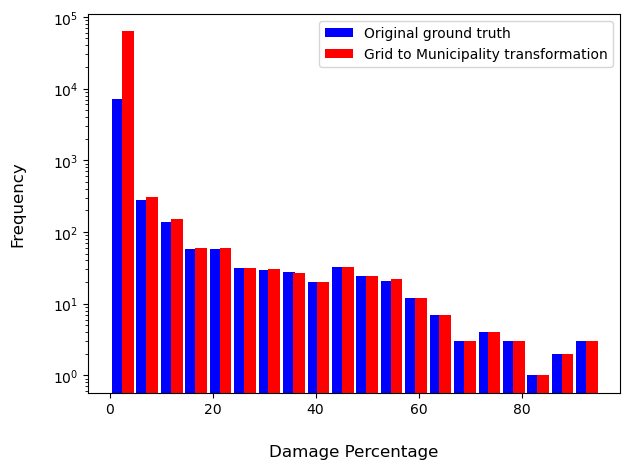

In [9]:
# makes the data
y1 = merged_df["y_norm_x"]
y2 = final_df_new["y_norm"]
colors = ["b", "r"]

# plots the histogram
fig, ax1 = plt.subplots()
ax1.hist(
    [y1, y2],
    color=colors,
    log=True,
    bins=20,
    label=["Original ground truth", "Grid to Municipality transformation"],
    width=2.3,
)
# ax1.set_xlim(-2, 100)
ax1.set_ylabel("Frequency", labelpad=20, size=12)
ax1.set_xlabel("Damage Percentage", labelpad=20, size=12)
plt.tight_layout()

plt.legend(loc="upper right")

# plt.savefig("figures/y_norm_histplot.pdf")
# Displaying the plot
plt.show()

/var/folders/sx/c10hm4fj3glf7mw1_mzwcl700000gn/T/ipykernel_10363/3796434428.py:62: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, max(max(df1_counts), max(df2_counts)) * 2)


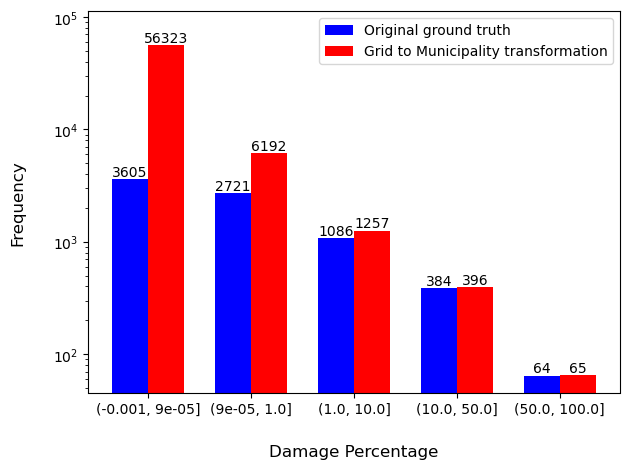

In [10]:
# Define the bins
bins = [0, 0.00009, 1, 10, 50, 100]

# Plotting the bar plots side by side
check_df1 = pd.cut(merged_df["y_norm_x"], bins=bins, include_lowest=True)
df1_counts = check_df1.value_counts(sort=False)

check_df2 = pd.cut(final_df_new["y_norm"], bins=bins, include_lowest=True)
df2_counts = check_df2.value_counts(sort=False)


# Calculate the x-axis positions for the bars
x = np.arange(len(df1_counts))
width = 0.35

# Plotting df1 bars
fig, ax = plt.subplots()
rects1 = ax.bar(
    x - width / 2,
    df1_counts,
    width,
    color="b",
    # alpha=0.5,
    log=True,
    label="Original ground truth",
)

# Plotting df2 bars
rects2 = ax.bar(
    x + width / 2,
    df2_counts,
    width,
    color="r",
    # alpha=0.5,
    log=True,
    label="Grid to Municipality transformation",
)

# Adding counts for df1
for rect in rects1:
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2,
        height + 0.5,
        height,
        ha="center",
        va="bottom",
    )

# Adding counts for df2
for rect in rects2:
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2,
        height + 0.5,
        height,
        ha="center",
        va="bottom",
    )

# Adjusting y-axis limits
ax.set_ylim(0, max(max(df1_counts), max(df2_counts)) * 2)


# Adding labels and title to the plot
ax.set_xlabel("Damage Percentage", labelpad=20, size=12)
ax.set_ylabel("Frequency", labelpad=20, size=12)
ax.set_title("")
ax.set_xticks(x)
ax.set_xticklabels(df1_counts.index)

plt.tight_layout()
ax.legend()

# Displaying the plot
# fig.savefig("figures/y_norm_barplots.pdf")
plt.show()